In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
file_name = "/content/drive/MyDrive/Phd_project/models/analysis_files/Consonant_deep_model_gray_v2"

In [4]:
data = np.load("/content/drive/MyDrive/Phd_project/dataset_v2/data50x50_con_aug_gray.npy")
labels = np.load("/content/drive/MyDrive/Phd_project/dataset_v2/labels50x50_con_aug_gray.npy")

In [5]:
data


array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [ 84,  53,  95, ..., 255, 255, 255],
        [ 89,  79,  79, ..., 255, 255, 255],
        [ 67,  65,  74, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       ...,

       [[245, 245, 244, ..., 241, 241, 241],
        [245, 245, 244, ..., 241, 240, 240],
        [245, 244, 243, ..., 240, 240, 240

In [6]:
labels

array(['GN', 'GN', 'GN', ..., 'AD', 'AD', 'AD'], dtype='<U3')

In [7]:
def show_img():
    cnt = np.random.randint(0,len(labels))
    plt.imshow(data[cnt])
    plt.title(labels[cnt])
    plt.axis("off")


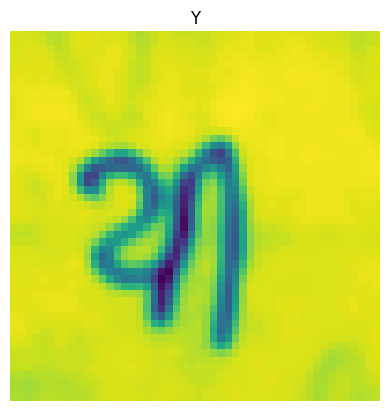

In [8]:
show_img()

In [9]:
data.shape

(985669, 50, 50)

In [10]:
labels.shape

(985669,)

In [11]:

data[0].shape

(50, 50)

In [12]:

data.size

2464172500

In [13]:
data[0].size

2500

In [14]:

data.ndim

3

In [15]:
data[0].ndim

2

In [16]:

classes = np.unique(labels)
classes

array(['AD', 'ADH', 'AL', 'AN', 'AT', 'ATH', 'B', 'BH', 'CH', 'CHH', 'D',
       'DH', 'F', 'G', 'GH', 'GN', 'H', 'J', 'K', 'KH', 'KS', 'L', 'M',
       'N', 'P', 'R', 'S', 'SH', 'SHH', 'T', 'TH', 'V', 'Y', 'Z'],
      dtype='<U3')

In [17]:
num_classes = len(classes)
num_classes

34

In [18]:
value_counts = {}
for char in classes:
    cnt = np.count_nonzero(labels == char)
    value_counts[char] = cnt

In [19]:
value_counts

{'AD': 28802,
 'ADH': 28668,
 'AL': 29873,
 'AN': 28250,
 'AT': 27489,
 'ATH': 29132,
 'B': 29035,
 'BH': 27838,
 'CH': 28349,
 'CHH': 29442,
 'D': 28307,
 'DH': 31379,
 'F': 28718,
 'G': 28607,
 'GH': 27512,
 'GN': 29564,
 'H': 31246,
 'J': 28780,
 'K': 30761,
 'KH': 28895,
 'KS': 29753,
 'L': 29311,
 'M': 28330,
 'N': 27954,
 'P': 28906,
 'R': 26200,
 'S': 30370,
 'SH': 31921,
 'SHH': 28598,
 'T': 28837,
 'TH': 28113,
 'V': 30104,
 'Y': 28481,
 'Z': 28144}

In [20]:


min(value_counts.values())

26200

In [21]:
sorted_values = list(value_counts.values())

In [22]:
sorted_values.sort()

In [23]:
sorted_values[:5]

[26200, 27489, 27512, 27838, 27954]

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import joblib

In [25]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, Dropout,MaxPooling2D,Flatten
from keras.optimizers import Adam

In [26]:
# image_size = (50, 50)
# batch_size = 10

In [27]:
# Load data and labels
# data = np.load("")
# labels = np.load("")

# data = data / 255

In [28]:
# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
numerical_labels = label_encoder.fit_transform(labels)

print((np.unique(numerical_labels)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]


In [29]:


# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    data, numerical_labels, test_size=0.3, stratify=numerical_labels
)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp
)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(689968, 50, 50)
(689968,)
(147851, 50, 50)
(147851,)
(147850, 50, 50)
(147850,)


In [30]:
# Rescale images to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Replicate the grayscale channel to create pseudo-RGB images
# X_train = np.repeat(X_train[..., np.newaxis], 3, -1)
# X_val = np.repeat(X_val[..., np.newaxis], 3, -1)
# X_test = np.repeat(X_test[..., np.newaxis], 3, -1)


In [31]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=len(np.unique(numerical_labels)))
y_val = to_categorical(y_val, num_classes=len(np.unique(numerical_labels)))
y_test = to_categorical(y_test, num_classes=len(np.unique(numerical_labels)))

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(689968, 50, 50)
(689968, 34)
(147851, 50, 50)
(147851, 34)
(147850, 50, 50)
(147850, 34)


In [32]:

# On-the-fly data augmentation
# X_traingen = ImageDataGenerator(
#     rotation_range=12,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.4,
#     zoom_range=0.1,
#     brightness_range=(0.5,1.2),
#     fill_mode='nearest'
# )

In [33]:
# train_generator = X_traingen.flow(X_train, y_train, batch_size=batch_size)


In [34]:
# Load pre-trained ResNet50 model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(50, 50, 3))


In [35]:
# Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False


In [36]:
# Build the complete model
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     Dense(len(np.unique(numerical_labels)), activation='softmax')
# ])

In [37]:
# Define the CNN model with more convolutional and dense layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a third convolutional layer with 128 filters
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
# Added a fourth convolutional layer with 256 filters
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Increased the size of the first dense layer
model.add(Dropout(0.4))  # Increased the dropout rate to 0.4
# Added a second dense layer with 256 units
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Added dropout to the second dense layer
model.add(Dense(len(np.unique(numerical_labels)), activation='softmax')) # Use number of unique labels


In [38]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
# Display the model summary
summary = model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [41]:
# Train the model with early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

In [42]:
start_time = time.time()
history = model.fit(
    X_train,y_train,
    # train_generator,
    # steps_per_epoch=len(X_train) // batch_size,
    epochs=40,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)
end_time = time.time()
training_time = end_time - start_time
print(training_time)

Epoch 1/40
21562/21562 [==============================] - 122s 5ms/step - loss: 1.2406 - accuracy: 0.6227 - val_loss: 0.5829 - val_accuracy: 0.8145
Epoch 2/40
21562/21562 [==============================] - 116s 5ms/step - loss: 0.6418 - accuracy: 0.8018 - val_loss: 0.5331 - val_accuracy: 0.8324
Epoch 3/40
21562/21562 [==============================] - 119s 5ms/step - loss: 0.5783 - accuracy: 0.8226 - val_loss: 0.4978 - val_accuracy: 0.8435
Epoch 4/40
21562/21562 [==============================] - 118s 5ms/step - loss: 0.5478 - accuracy: 0.8326 - val_loss: 0.4583 - val_accuracy: 0.8559
Epoch 5/40
21562/21562 [==============================] - 118s 5ms/step - loss: 0.5277 - accuracy: 0.8396 - val_loss: 0.4570 - val_accuracy: 0.8570
Epoch 6/40
21562/21562 [==============================] - 119s 5ms/step - loss: 0.5143 - accuracy: 0.8435 - val_loss: 0.4571 - val_accuracy: 0.8574
Epoch 7/40
21562/21562 [==============================] - 118s 5ms/step - loss: 0.5060 - accuracy: 0.8465 - val_

In [43]:
# Save training history to a text file
import os
os.chdir("/content/drive/MyDrive/Phd_project/models/analysis_files")

# with open(f'{file_name}.txt', 'w') as file:
#     file.write(f"{file_name}\n\n")
#     file.write(f"Training time : {training_time}\n")
#     file.write(str(history.history))
with open(f'Consonant_deep_model_gray_v2.txt', 'w') as file:
    file.write(f"{file_name}\n\n")
    file.write(f"Training time : {training_time}\n")
    file.write(f"Model Summary : {summary}\n")
    file.write(str(history.history))

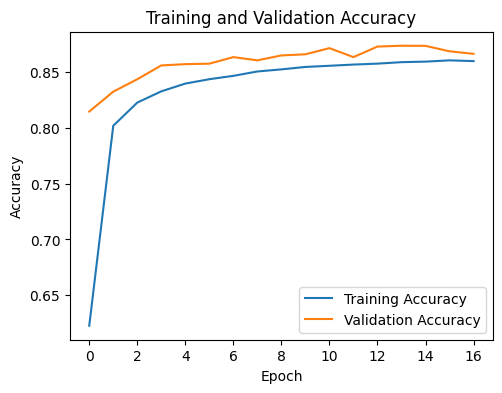

In [44]:
# Plot accuracy and loss graphs
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

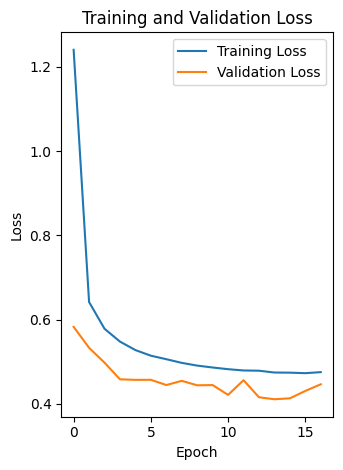

In [45]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [46]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


4621/4621 [==============================] - 12s 3ms/step - loss: 0.4101 - accuracy: 0.8742
Test Accuracy: 87.42%


In [47]:
# Generate predictions
predictions = model.predict(X_test)


4621/4621 [==============================] - 9s 2ms/step


In [48]:
# Convert one-hot encoded labels back to numerical labels
true_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(predictions, axis=1)


In [49]:
# Convert numerical labels back to string labels
true_labels_str = label_encoder.inverse_transform(true_labels)
predicted_labels_str = label_encoder.inverse_transform(predicted_labels)


In [50]:
# Generate and save classification report and confusion matrix
classification_rep = classification_report(true_labels_str, predicted_labels_str)
confusion_mat = confusion_matrix(true_labels_str, predicted_labels_str,labels=np.unique(true_labels_str))


In [51]:
import os
os.chdir("/content/drive/MyDrive/Phd_project/models/analysis_files")
with open(f'Consonant_deep_model_gray_v2.txt', 'a') as file:
    file.write(f"Classification Report :\n{classification_rep}")
    file.write(f"Confusion Metrix :\n{confusion_mat}\n\n")
    file.write(f"Test_loss : {test_loss} \nTest_accuracy : {test_accuracy}")



In [52]:
print(f"Classification Report : {classification_rep}")
print(f"confusion_matrix : {confusion_mat}")


Classification Report :               precision    recall  f1-score   support

          AD       0.82      0.89      0.85      4320
         ADH       0.92      0.88      0.90      4300
          AL       0.88      0.93      0.91      4481
          AN       0.94      0.91      0.92      4238
          AT       0.91      0.88      0.89      4124
         ATH       0.79      0.93      0.86      4370
           B       0.88      0.91      0.89      4355
          BH       0.92      0.91      0.92      4176
          CH       0.89      0.90      0.89      4253
         CHH       0.90      0.83      0.87      4416
           D       0.88      0.88      0.88      4246
          DH       0.84      0.63      0.72      4707
           F       0.80      0.84      0.82      4308
           G       0.88      0.94      0.91      4291
          GH       0.68      0.81      0.74      4127
          GN       0.92      0.99      0.95      4434
           H       0.89      0.77      0.83      4687
   

In [53]:
model.save('/content/drive/MyDrive/models/Consonant_model_gray_v2.h5')
joblib.dump(label_encoder, '/content/drive/MyDrive/models/Consonant_label_encoder_gray_v2.joblib')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['/content/drive/MyDrive/models/Consonant_label_encoder_gray_v2.joblib']

In [54]:
np.save('/content/drive/MyDrive/Phd_project/models/Consonant_label_encoder_gray_v2.npy', label_encoder.classes_)

In [55]:
np.savetxt('confusion_matrix_con_gray_v2.txt', confusion_mat, fmt='%d')


In [56]:
predicted_labels_str

array(['KH', 'N', 'H', ..., 'J', 'SHH', 'J'], dtype='<U3')

In [ ]:
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=predicted_labels_str, yticklabels=true_labels_str)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()